In [15]:
#第二类挖矿恶意软件EDA
#特点：在数据中得到体现，占用大量资源、时间序列，多线程齐行，
import pandas as pd
data_df2=pd.read_csv('label2.csv')

In [16]:
data_df2.head()

,file_id,label,api,tid,return_value,index
0,24,2,LdrLoadDll,2472,0,0
1,24,2,LdrGetProcedureAddress,2472,0,1
2,24,2,LdrGetProcedureAddress,2472,0,2
3,24,2,LdrGetProcedureAddress,2472,0,3
4,24,2,LdrGetProcedureAddress,2472,0,4


In [17]:
api=data_df2['api'].value_counts()

In [18]:
api

NtClose                       703737
LdrGetProcedureAddress        488937
RegQueryValueExW              425382
Process32NextW                283435
RegCloseKey                   257234
GetSystemTimeAsFileTime       254279
NtAllocateVirtualMemory       242232
RegOpenKeyExW                 230313
FindFirstFileExW              191660
NtOpenKey                     152865
LoadStringW                   134579
NtQueryValueKey               129200
NtDelayExecution              115468
RegOpenKeyExA                 113072
NtQueryDirectoryFile          105992
NtReadFile                    104062
NtCreateFile                   89073
WriteConsoleW                  85464
LdrGetDllHandle                84157
WriteConsoleA                  80374
LdrLoadDll                     73423
NtMapViewOfSection             72702
NtCreateSection                70055
NtOpenProcess                  68413
NtUnmapViewOfSection           59642
RegQueryValueExA               57839
__exception__                  55588
R

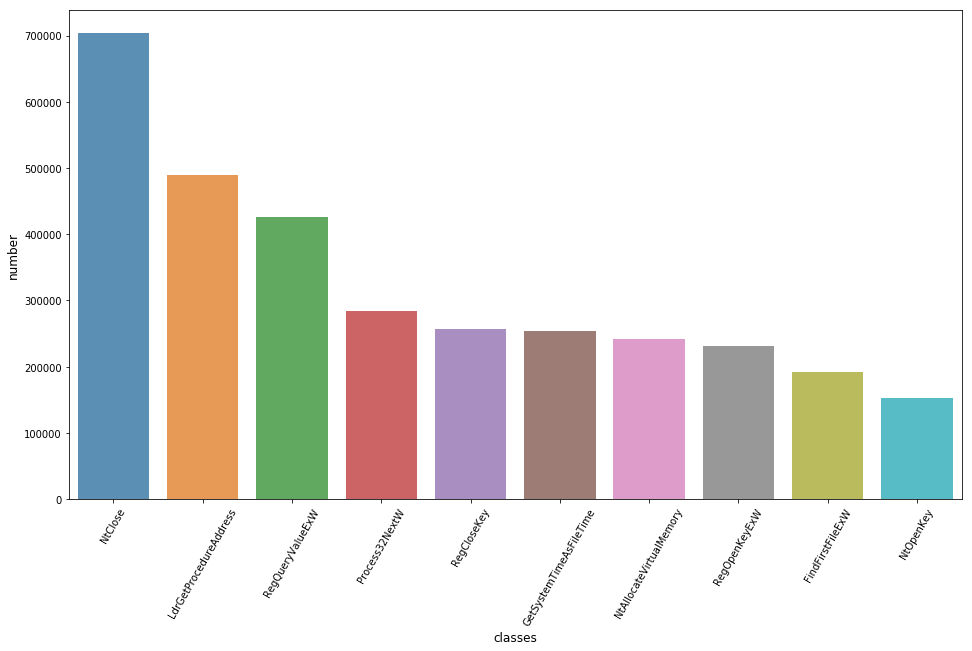

In [19]:
#所有文件中top api调用数量
#柱状图
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,9))
sns.barplot(api.index[0:10],api.values[0:10],alpha=0.8)
plt.xticks(rotation=60)
plt.xlabel("classes",fontsize = 12)
plt.ylabel("number",fontsize=12)
plt.show()

In [20]:
every_file2=data_df2.groupby('file_id')['api'].count().sort_values(ascending=False)

In [21]:
every_file2

file_id
64173     406399
25312     391349
42615     293097
100797    248100
106082    234271
76389     213311
62311     206122
65749     143135
73216     142413
60669     125921
71774     108224
92905     108218
4850      107966
89539     104609
10626      92285
6888       87241
110237     86595
67918      85308
65446      76097
6877       64029
33214      54866
65448      53040
36832      52940
82814      50010
102211     48932
81419      43504
26146      43197
61912      39643
103586     39410
75319      37653
           ...  
36896         48
27403         48
29472         48
41442         48
105395        48
106081        48
106021        48
8457          48
51902         48
55198         48
66056         47
28738         47
104657        42
21149         34
80468         32
92153         32
79666         32
104441        30
78023         20
101610        17
97740         17
9194          16
31577         16
93815         16
28937         16
58620         16
81135          6
93110 

In [22]:
import numpy
index=[]
for i in range(len(every_file2)):
    index.append(i)
index=numpy.array(index)

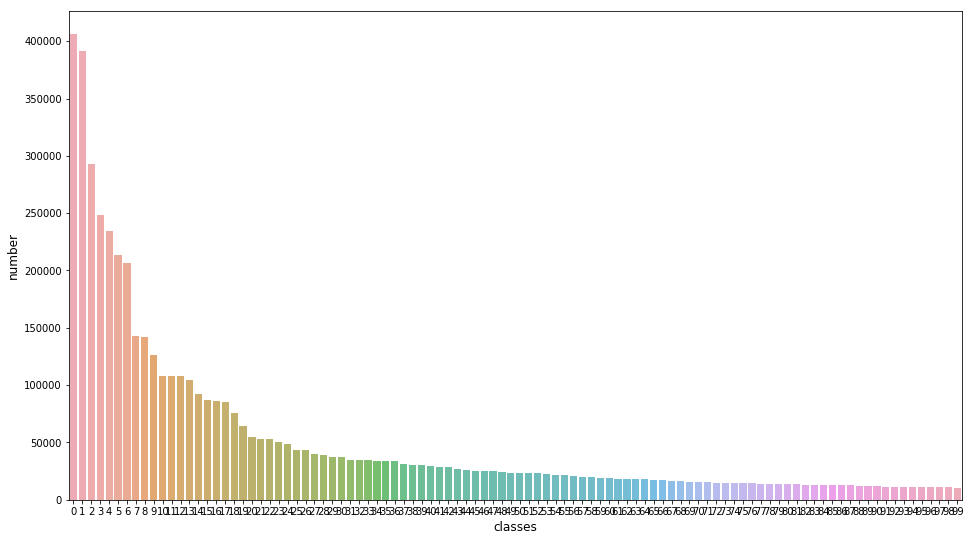

In [23]:
#每个文件调用api数量分布图，每个文件之间对比
#柱状图
import matplotlib.pyplot as plt
import seaborn as sns
import numpy

plt.figure(figsize=(16,9))
sns.barplot(index[0:100],every_file2.values[0:100],alpha=0.8)
plt.xlabel("classes",fontsize = 12)
plt.ylabel("number",fontsize=12)
plt.show()

/home/admin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


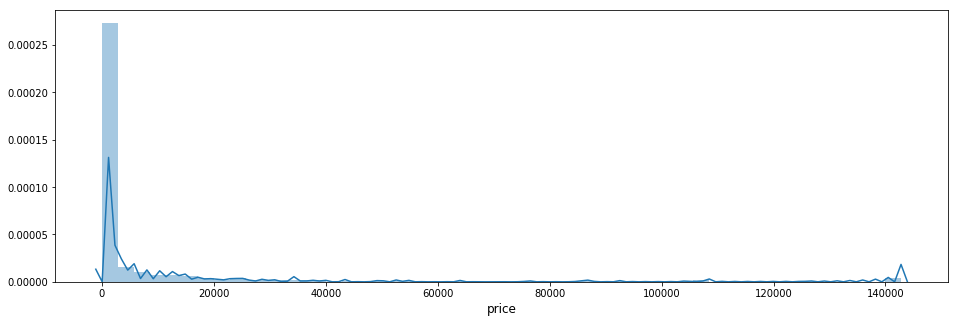

In [24]:

#文件调用api数量分布直方图
ulimit_start = numpy.percentile(every_file2.values,1)
ulimit_end = numpy.percentile(every_file2.values,99)
every_file2.loc[[every_file2.iloc[i]<ulimit_start for i in range(len(every_file2))]]=ulimit_start
every_file2.loc[[every_file2.iloc[i]>ulimit_end for i in range(len(every_file2))]]=ulimit_end
plt.figure(figsize=(16,5))
sns.distplot(every_file2.values,bins=50,kde=True)
plt.xlabel('price',fontsize=12)
plt.show()

In [25]:
every_file2

file_id
64173     142824.54
25312     142824.54
42615     142824.54
100797    142824.54
106082    142824.54
76389     142824.54
62311     142824.54
65749     142824.54
73216     142413.00
60669     125921.00
71774     108224.00
92905     108218.00
4850      107966.00
89539     104609.00
10626      92285.00
6888       87241.00
110237     86595.00
67918      85308.00
65446      76097.00
6877       64029.00
33214      54866.00
65448      53040.00
36832      52940.00
82814      50010.00
102211     48932.00
81419      43504.00
26146      43197.00
61912      39643.00
103586     39410.00
75319      37653.00
            ...    
36896         48.00
27403         48.00
29472         48.00
41442         48.00
105395        48.00
106081        48.00
106021        48.00
8457          48.00
51902         48.00
55198         48.00
66056         47.00
28738         47.00
104657        42.00
21149         34.00
80468         32.00
92153         32.00
79666         32.00
104441        30.00
78023       

In [26]:
#第一个文件散点图
file_1=data_df2[data_df2['file_id']==64173]

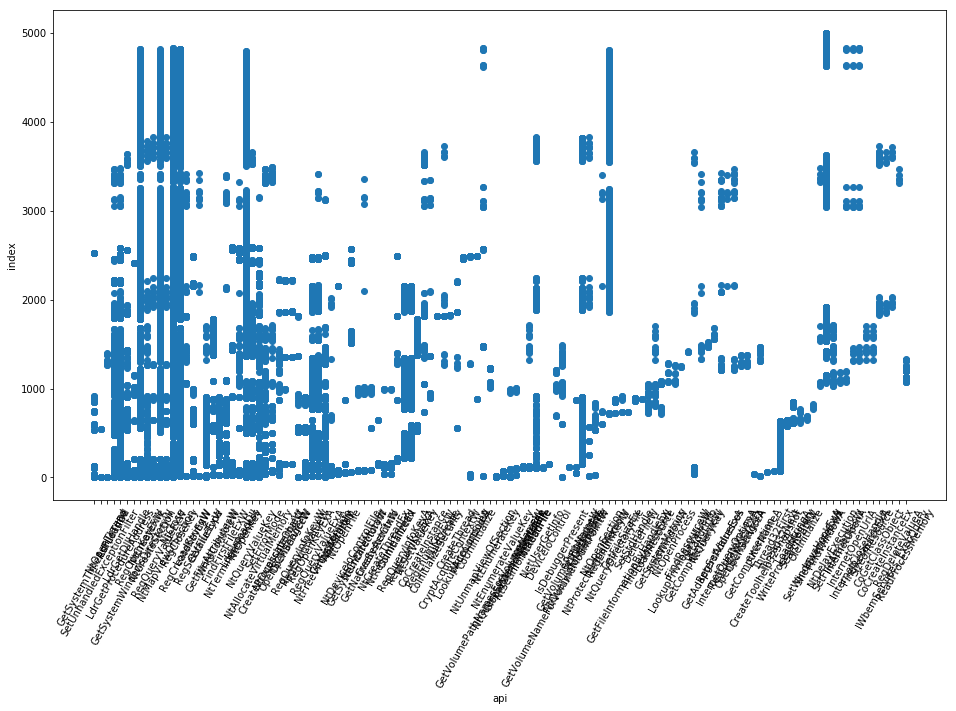

In [28]:
plt.figure(figsize=(16,9))
plt.scatter((file_1['api'].values),(file_1['index']))
plt.xticks(rotation=60)
plt.yticks(rotation=360)
plt.xlabel('api',fontsize=10)
plt.ylabel('index',fontsize=10)
plt.show()

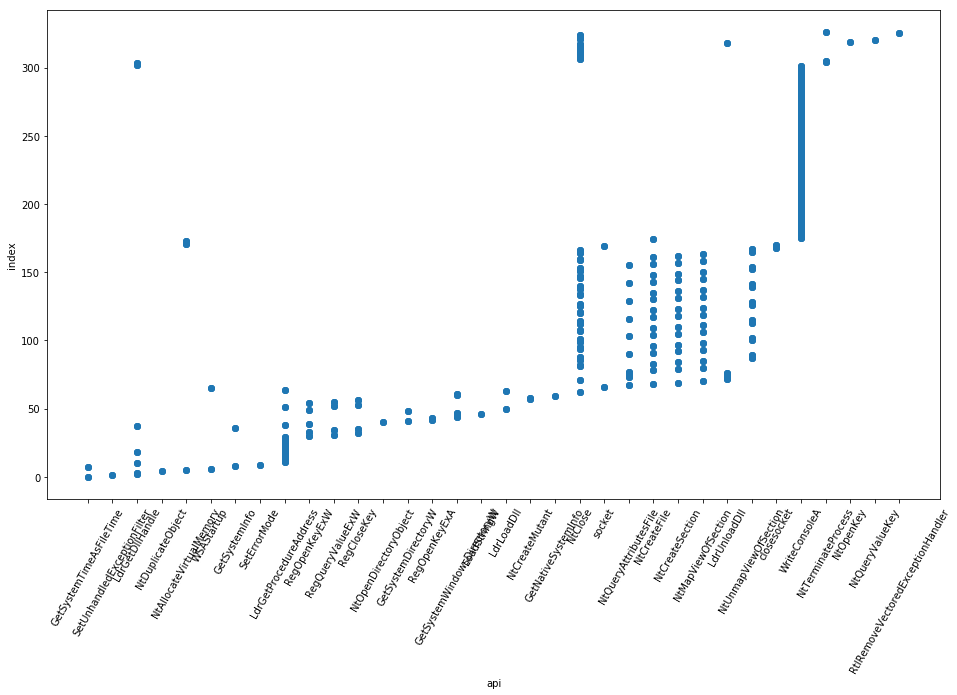

In [29]:
#第%50个文件散点图
file_2=data_df2[data_df2['file_id']==85257]
plt.figure(figsize=(16,9))

plt.scatter((file_2['api'].values),file_2['index'])
plt.xticks(rotation=60)
plt.yticks(rotation=360)
plt.xlabel('api',fontsize=10)
plt.ylabel('index',fontsize=10)
plt.show()

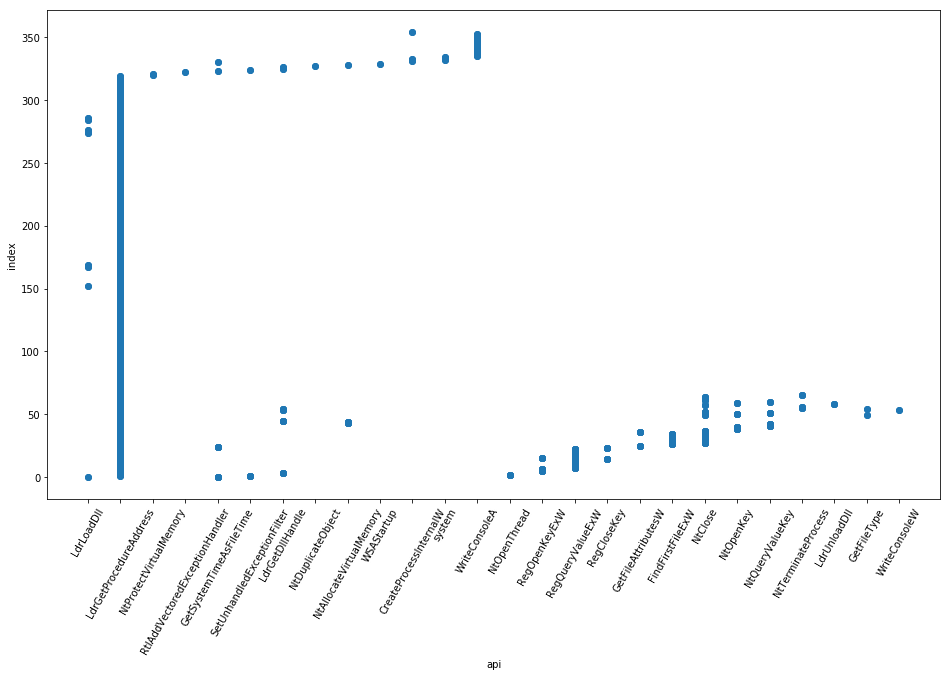

In [30]:
#第%50个文件散点图
file_4=data_df2[data_df2['file_id']==24]
plt.figure(figsize=(16,9))
plt.scatter((file_4['api'].values),file_4['index'])
plt.xticks(rotation=60)
plt.yticks(rotation=360)
plt.xlabel('api',fontsize=10)
plt.ylabel('index',fontsize=10)
plt.show()

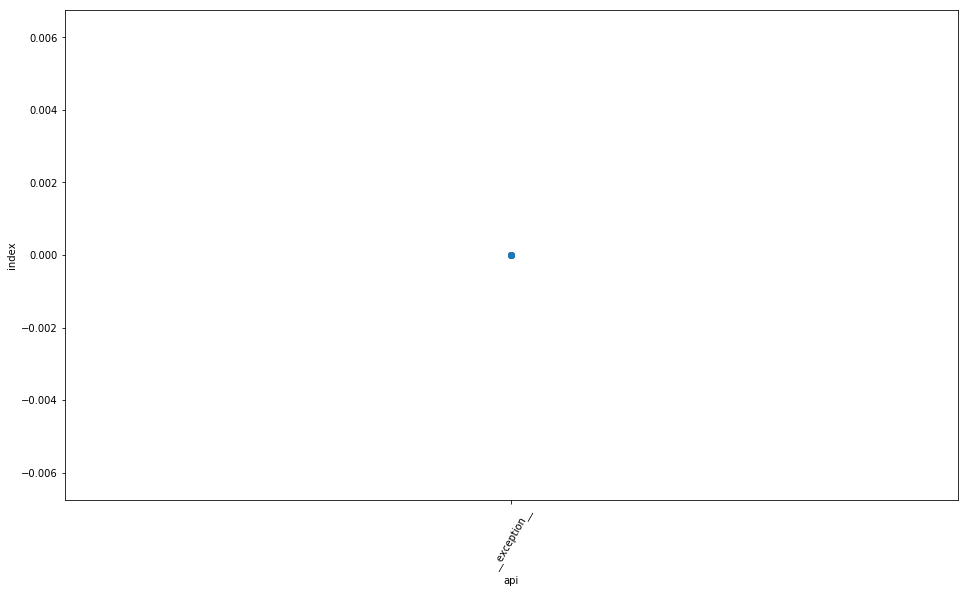

In [31]:
#第99%个文件散点图
file_3=data_df2[data_df2['file_id']==4851]
plt.figure(figsize=(16,9))
plt.scatter((file_3['api'].values),file_3['index'])
plt.xticks(rotation=60)
plt.yticks(rotation=360)
plt.xlabel('api',fontsize=10)
plt.ylabel('index',fontsize=10)
plt.show()

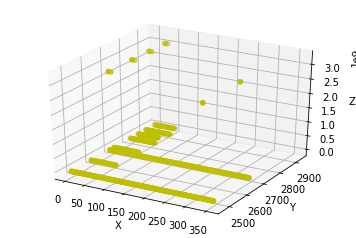

In [32]:
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 
data =np.array(data_df2[data_df2['file_id']==24][['index','tid','return_value']])
x, y, z = data[:,0], data[:,1], data[:,2] 

ax = plt.subplot(111, projection='3d') # 创建一个三维的绘图工程 #  将数据点分成三部分画，在颜色上有区分度 
ax.scatter(x, y, z, c='y') # 绘制数据点 
#ax.scatter(x[10:20], y[10:20], z[10:20], c='r') 
#ax.scatter(x[30:40], y[30:40], z[30:40], c='g') 
ax.set_zlabel('Z') # 坐标轴 
ax.set_ylabel('Y') 
ax.set_xlabel('X') 
plt.show()


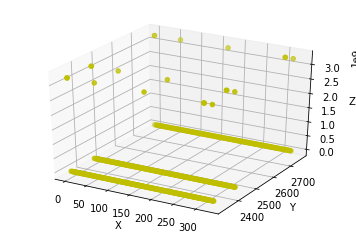

In [33]:
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 
data =np.array(data_df2[data_df2['file_id']==85257][['index','tid','return_value']])
x, y, z = data[:,0], data[:,1], data[:,2] 

ax = plt.subplot(111, projection='3d') # 创建一个三维的绘图工程 #  将数据点分成三部分画，在颜色上有区分度 
ax.scatter(x, y, z, c='y') # 绘制数据点 
#ax.scatter(x[10:20], y[10:20], z[10:20], c='r') 
#ax.scatter(x[30:40], y[30:40], z[30:40], c='g') 
ax.set_zlabel('Z') # 坐标轴 
ax.set_ylabel('Y') 
ax.set_xlabel('X') 
plt.show()


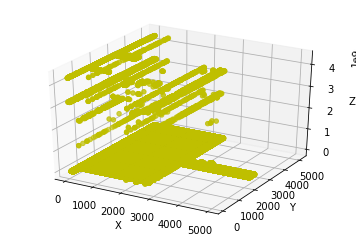

In [34]:
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 
data =np.array(data_df2[data_df2['file_id']==64173][['index','tid','return_value']])
x, y, z = data[:,0], data[:,1], data[:,2] 

ax = plt.subplot(111, projection='3d') # 创建一个三维的绘图工程 #  将数据点分成三部分画，在颜色上有区分度 
ax.scatter(x, y, z, c='y') # 绘制数据点 
#ax.scatter(x[10:20], y[10:20], z[10:20], c='r') 
#ax.scatter(x[30:40], y[30:40], z[30:40], c='g') 
ax.set_zlabel('Z') # 坐标轴 
ax.set_ylabel('Y') 
ax.set_xlabel('X') 
plt.show()
